In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy
from scipy.stats import entropy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score
from sklearn import preprocessing

### Metricas de rodamientos

In [120]:
# Root Mean Squared Sum
def calculate_rms(df):
    result = []
    for col in df:
        r = np.sqrt((df[col]**2).sum() / len(df[col]))
        result.append(r)
    return result

# extract peak-to-peak features
def calculate_p2p(df):
    return np.array(df.max().abs() + df.min().abs())

# extract shannon entropy (cut signals to 500 bins)
def calculate_entropy(df):
    ent = []
    for col in df:
        ent.append(entropy(pd.cut(df[col], 500).value_counts()))
    return np.array(ent)
# extract clearence factor
def calculate_clearence(df):
    result = []
    for col in df:
        r = ((np.sqrt(df[col].abs())).sum() / len(df[col]))**2
        result.append(r)
    return result
def get_all_metrics(data):
    mean_abs = data.abs().mean()
    std = data.std()
    skew = data.skew()
    kurtosis = data.kurtosis()
    #entropy = calculate_entropy(data)
    #rms = np.array(calculate_rms(data))
    max_abs = data.abs().max()
    #p2p = calculate_p2p(data)
    #crest = max_abs/rms
    #clearence = np.array(calculate_clearence(data))
    #shape = rms / mean_abs
    N = len(data)
    rms = np.sqrt(1/N * (data**2).sum())
    impulse = max_abs / mean_abs
    return [mean_abs,std,skew,kurtosis,max_abs,impulse,rms]


### Calculo  de RMS

In [134]:
dir = "2"
files = os.listdir(dir)
files.sort()
rms_list = list()
for f in files:
    df = pd.read_csv(dir+"/"+f,header=None,sep="\t")
    x_1 = np.array(df[0])
    x_2 = np.array(df[1])
    x_3 = np.array(df[2])
    x_4 = np.array(df[3]) 
    xs = [x_1,x_2,x_3,x_4]
    rms_all = [np.sqrt(1/len(x) * (x**2).sum()) for x in xs]
    rms_list.append(rms_all)
rms_list

[[0.07417899856512625,
  0.09094388696428075,
  0.10940413919878957,
  0.054103468039546694],
 [0.07538245681139528,
  0.09341888819652586,
  0.10981733168262023,
  0.05610085870694182],
 [0.07622977446919937,
  0.0937178978891739,
  0.1098610497134477,
  0.0561452192491155],
 [0.07872367646602974,
  0.09294709910708282,
  0.11066653439923697,
  0.05680743024340544],
 [0.07847429073677968,
  0.09534796855424806,
  0.1075055998723148,
  0.05684094146786386],
 [0.07831464139380724,
  0.09240471945595839,
  0.11051722747318345,
  0.055565926760892545],
 [0.07863244325857172,
  0.09391848531980074,
  0.10738791213109136,
  0.05627907668624504],
 [0.07777288022464836,
  0.09324051612714428,
  0.10623263552958903,
  0.05550468422307369],
 [0.07902942984262255,
  0.09585924383650359,
  0.11058641872246056,
  0.05585509861253156],
 [0.07571755989830314,
  0.09474187125009063,
  0.10977074854590418,
  0.0554596132439803],
 [0.07924111648011797,
  0.09514610526793124,
  0.10602371468766728,
  0.

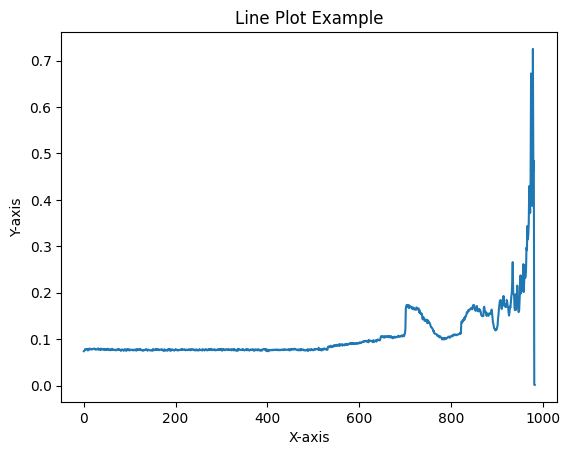

In [157]:
import matplotlib.pyplot as plt

# Sample data
x = [i for i in range(len(rms_list))]
y = [elem[0] for elem in rms_list]

# Create a line plot
plt.plot(x, y)

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Line Plot Example')

# Display the plot
plt.show()


### Calculo de Relative RMS (RRMS)

In [155]:
df_rms = pd.DataFrame(rms_list,columns=[1,2,3,4])
mean_rms = np.array(df_rms.mean(axis=0))


df_rrms = pd.DataFrame([[bearing/mean_rms[i] for i,bearing in enumerate(elem)] for elem in rms_list],columns=[1,2,3,4])
df_rrms

,1,2,3,4
0,0.699072,0.920924,1.045358,0.897703
1,0.710413,0.945987,1.049306,0.930844
2,0.718398,0.949015,1.049724,0.931580
3,0.741901,0.941210,1.057420,0.942568
4,0.739551,0.965521,1.027218,0.943124
...,...,...,...,...
979,6.832500,2.210514,1.629864,2.461491
980,4.354053,1.729742,1.699625,1.935160
981,4.559722,1.960866,1.790662,2.166665
982,0.019819,0.040686,0.037744,0.035734


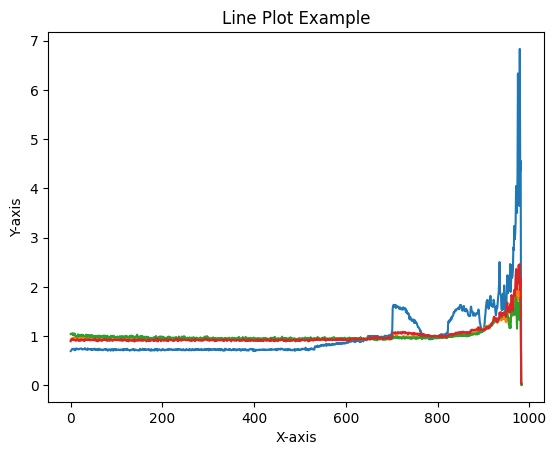

In [156]:
import matplotlib.pyplot as plt

# Sample data
x = [i for i in range(df_rrms.shape[0])]
y_1 = df_rrms[1]
y_2 = df_rrms[2]
y_3 = df_rrms[3]
y_4 = df_rrms[4]


# Create a line plot
plt.plot(x, y_1)
plt.plot(x, y_2)
plt.plot(x, y_3)
plt.plot(x, y_4)

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Line Plot Example')

# Display the plot
plt.show()

### Calculo de SRMS

In [139]:
#Obtenemos muestra de RMS promedio por rodamiento

mean_rms_per_bearing = np.array(rms_list[500:1000]).sum(axis=0)/500
srms_list = [[bearing/mean_rms_per_bearing[i] for i,bearing in enumerate(elem)] for elem in rms_list]



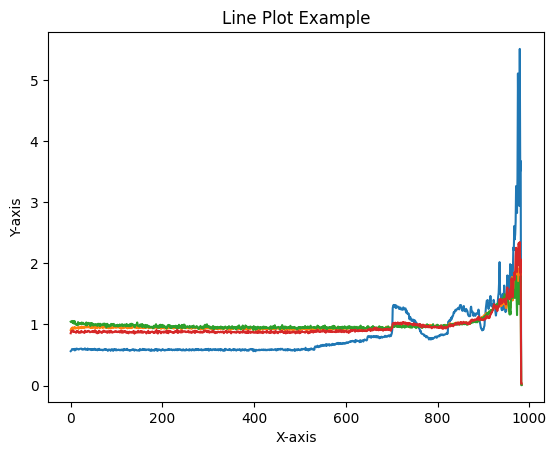

In [140]:
import matplotlib.pyplot as plt

# Sample data
x = [i for i in range(len(srms_list))]
y_1 = [elem[0] for elem in srms_list]
y_2 = [elem[1] for elem in srms_list]
y_3 = [elem[2] for elem in srms_list]
y_4 = [elem[3] for elem in srms_list]

# Create a line plot
plt.plot(x, y_1)
plt.plot(x, y_2)
plt.plot(x, y_3)
plt.plot(x, y_4)

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Line Plot Example')

# Display the plot
plt.show()

### Smoothing el SRMS con moving average

In [141]:
df_srms = pd.DataFrame(srms_list,columns=[1,2,3,4])
df_srms_smoothed = df_srms.rolling(30).mean()
df_srms_smoothed

,1,2,3,4
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
979,2.459471,1.571809,1.464200,1.781596
980,2.530147,1.583482,1.472668,1.794368
981,2.598376,1.600363,1.483286,1.810756
982,2.538815,1.553771,1.435981,1.758397


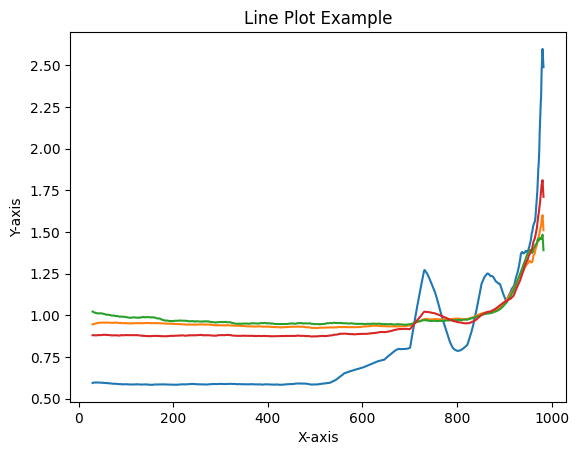

In [142]:
import matplotlib.pyplot as plt

# Sample data
x = [i for i in range(len(df_srms_smoothed))]
y_1 = df_srms_smoothed[1]
y_2 = df_srms_smoothed[2]
y_3 = df_srms_smoothed[3]
y_4 = df_srms_smoothed[4]

# Create a line plot
plt.plot(x, y_1)
plt.plot(x, y_2)
plt.plot(x, y_3)
plt.plot(x, y_4)

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Line Plot Example')

# Display the plot
plt.show()

### Calcular gradient of Health Indicator

In [111]:
df_srms_smoothed_no_nan = df_srms_smoothed.iloc[29:].reset_index(drop=True)

df_srms_smoothed_no_nan_offset = df_srms_smoothed_no_nan.iloc[30:].reset_index(drop=True)
test = (df_srms_smoothed_no_nan_offset - df_srms_smoothed_no_nan) / 30

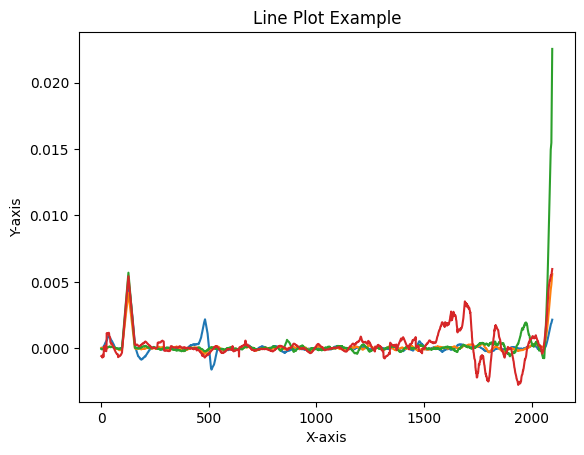

In [112]:
import matplotlib.pyplot as plt

# Sample data
x = [i for i in range(len(test))]
y_1 = test[1]
y_2 = test[2]
y_3 = test[3]
y_4 = test[4]

# Create a line plot
plt.plot(x, y_1)
plt.plot(x, y_2)
plt.plot(x, y_3)
plt.plot(x, y_4)

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Line Plot Example')

# Display the plot
plt.show()

In [110]:
test.iloc[2080]

1    0.001071
2    0.002768
3    0.008988
4    0.004588
Name: 2080, dtype: float64